<a href="https://colab.research.google.com/github/rogermarinplana/personalProjects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_hdf("datasets/nsfg.hdf5")

In [52]:
df.shape

(9358, 10)

In [53]:
df.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [55]:
df.birthwgt_lb1.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [56]:
# max value is suspiciously large at 99 pounds
# standard deviation of 11 pounds is highly unlikely to be possible

In [57]:
df.birthwgt_lb1.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [58]:
# 98 and 99 pound babies are likely to be an error
# Looking at the documentation we learn that the values of 98 and 99 are given to cases where measurement was refused/unknown. We can remove them.

In [59]:
df.birthwgt_lb1.replace([98, 99], np.nan, inplace=True)

In [60]:
df.birthwgt_lb1.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [61]:
df.birthwgt_oz1.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [62]:
df["birth_weight"] = df.birthwgt_lb1 + df.birthwgt_oz1 / 16

In [63]:
df.birthwgt_oz1.value_counts().sort_index()
df.birthwgt_oz1.replace([98, 99], np.nan, inplace=True)

In [64]:
df.agecon = df['agecon'] / 100
df.agepreg = df['agepreg'] / 100

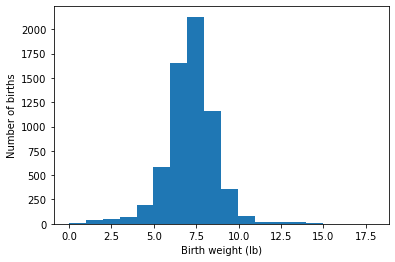

In [65]:
plt.hist(df["birth_weight"].dropna(), bins=18)
plt.ylabel("Number of births")
plt.xlabel("Birth weight (lb)")
plt.show()

### Probability distribution functions

<function matplotlib.pyplot.show(close=None, block=None)>

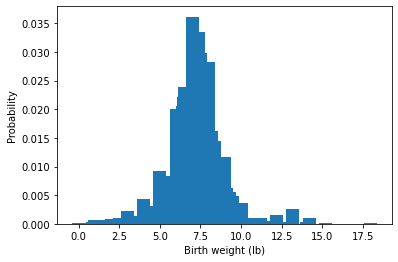

In [66]:
# pmf -> Probability mass function: probability that you get X
# for small number of unique values
pmf = df["birth_weight"].value_counts(normalize=True).sort_index()
plt.bar(pmf.index, pmf)
plt.ylabel("Probability")
plt.xlabel("Birth weight (lb)")
plt.show

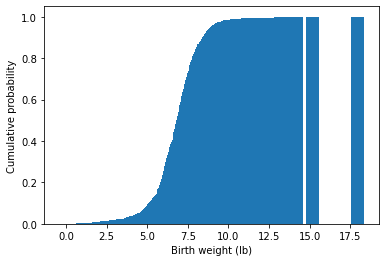

In [67]:
# cdf -> cummulative distribution function
# for exploration
cdf = np.cumsum(pmf)
plt.bar(cdf.index, cdf)
plt.ylabel("Cumulative probability")
plt.xlabel("Birth weight (lb)")
plt.show()

<AxesSubplot:xlabel='birth_weight', ylabel='Density'>

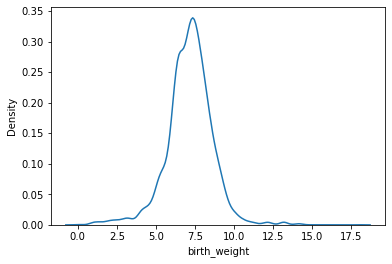

In [68]:
# pdf -> probability density function
# if there are a lot of values
sns.kdeplot(df["birth_weight"])

In [69]:
df1 = pd.read_hdf("datasets/brfss.hdf5")

In [70]:
df1.shape

(100000, 9)

In [71]:
df1.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       99938 non-null   float64
 1   HTM4      95143 non-null   float64
 2   WTKG3     93404 non-null   float64
 3   INCOME2   83447 non-null   float64
 4   _LLCPWT   100000 non-null  float64
 5   _AGEG5YR  98794 non-null   float64
 6   _VEGESU1  87713 non-null   float64
 7   _HTMG10   95143 non-null   float64
 8   AGE       98794 non-null   float64
dtypes: float64(9)
memory usage: 7.6 MB


In [73]:
df1.describe()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
count,99938.000000,95143.000000,93404.000000,83447.000000,100000.000000,98794.000000,87713.000000,95143.000000,98794.000000
mean,1.513809,170.090443,81.202017,5.788656,2785.881001,6.103296,1.926845,163.915369,47.720732
std,0.499812,10.795080,20.945679,2.229189,3982.612684,3.601652,1.290404,11.297379,18.873769
min,1.000000,91.000000,23.130000,1.000000,5.774036,1.000000,0.000000,90.000000,21.000000
25%,1.000000,163.000000,66.220000,4.000000,579.932565,3.000000,1.140000,160.000000,32.000000
50%,2.000000,170.000000,78.930000,6.000000,1378.138470,6.000000,1.700000,160.000000,47.000000
75%,2.000000,178.000000,90.720000,8.000000,3202.380370,9.000000,2.410000,170.000000,62.000000
max,2.000000,226.000000,272.610000,8.000000,45053.592700,13.000000,15.000000,220.000000,89.500000


In [74]:
height = df1.HTM4
weight = df1.WTKG3

## Relationships between variables

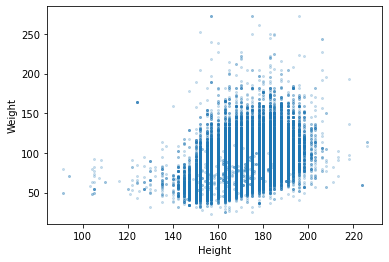

In [75]:
# scatter plot
plt.plot(height, weight, "o", alpha=0.2, markersize=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

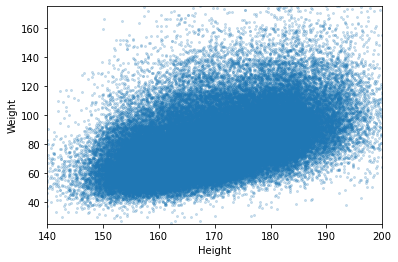

In [76]:
# jittering: adding random noise
height_jitter = height + np.random.normal(0, 2, size=len(df1))
weight_jitter = weight + np.random.normal(0, 2, size=len(df1))
plt.plot(height_jitter, weight_jitter, "o", alpha=0.2, markersize=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.axis([140, 200, 25, 175])
plt.show()

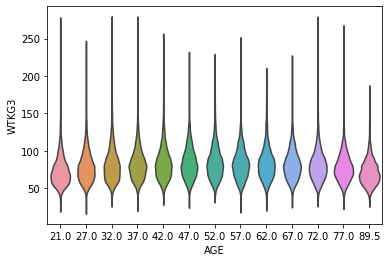

In [82]:
# violin plot
data = df1.dropna(subset=["AGE", "WTKG3"])
sns.violinplot(x="AGE", y="WTKG3", data=data, inner=None)
plt.show()

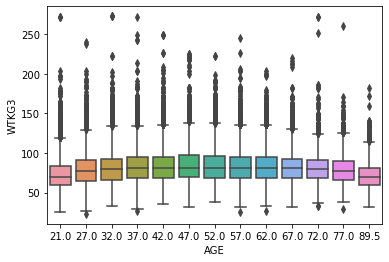

In [90]:
# box plot
sns.boxplot(x="AGE", y="WTKG3", data=data)
plt.show()

In [91]:
# correlation
df1[["AGE", "HTM4", "WTKG3"]].corr()
# Weak linear correlation between age and weight/height.

,AGE,HTM4,WTKG3
AGE,1.000000,-0.093684,0.021641
HTM4,-0.093684,1.000000,0.474203
WTKG3,0.021641,0.474203,1.000000


In [102]:
from scipy.stats import linregress
subset = df1[["HTM4", "WTKG3"]].dropna()
height = subset["HTM4"]
weight = subset["WTKG3"]
res = linregress(height, weight)
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

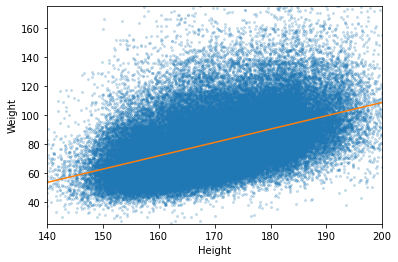

In [122]:
fx = np.array([height.min(), height.max()])
fy = res.intercept + res.slope * fx
plt.plot(height_jitter, weight_jitter, "o", alpha=0.2, markersize=2)
plt.plot(fx, fy, "-")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.axis([140, 200, 25, 175])
plt.show()
